# Resume Parsing and Text Comparsion Algorithm

In [1]:
from selenium import webdriver
import time
import pandas as pd
import csv
import re
import spacy
import sys
from importlib import reload
reload(sys)
from io import StringIO
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
import os
import sys, getopt
import numpy as np
from bs4 import BeautifulSoup
from urllib.request import urlopen
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words = set(stopwords.words('english'))

In [13]:
# Data the excel file that is stored at the time of scraping to retrieve job data
job_data = pd.read_excel('LinkedIn Job.xlsx')
job_data = pd.DataFrame(job_data)

In [14]:
job_data

,ID,Date,Company,Title,Location,Link,Job Description
0,3018037978,2022-03-17,"Neel-Schaffer, Inc.",Civil Engineer Intern III,"New Orleans, LA",https://www.linkedin.com/jobs/view/civil-engin...,"NEW ORLEANS, LA\n\nNeel-Schaffer is not just a..."
1,3009049013,2022-03-12,"PRIME AE Group, Inc.",Engineering Intern,"Harrisburg, PA",https://www.linkedin.com/jobs/view/engineering...,"PRIME AE Group, Inc. ( www.primeeng.com ), a m..."
2,3018954649,2022-03-17,Hanson Professional Services Inc.,Railway Engineering Internship 2022,"Washington, United States",https://www.linkedin.com/jobs/view/railway-eng...,Hanson Professional Services Inc. is a dynamic...
3,2888824258,2022-01-22,Eversource Energy,Transmission Cost & Performance Intern,"South Hadley, MA",https://www.linkedin.com/jobs/view/transmissio...,Check out this video and find out why our team...
4,2888818811,2022-01-22,Eversource Energy,Transmission Cost & Performance Intern,"Berlin, CT",https://www.linkedin.com/jobs/view/transmissio...,Check out this video and find out why our team...
...,...,...,...,...,...,...,...
95,3044390427,2022-03-31,ClearanceJobs,Software Engineer Intern- clearance eligibilit...,"Chantilly, VA",https://www.linkedin.com/jobs/view/software-en...,Bachelor's Degree (in the works) in Computer S...
96,None,2022-04-22,Zurn Water Solutions,Software Development Intern,"Milwaukee, WI",https://www.linkedin.com/jobs/view/software-de...,The .Net Software Developer Intern will help t...
97,3039326853,2022-04-25,insightsoftware,"Intern, Software Engineering","Raleigh, NC",https://www.linkedin.com/jobs/view/intern-soft...,"We’re looking for a talented, creative, and ea..."
98,3041024748,2022-03-29,Global Payments Inc.,Software Engineer Intern,"Chicago, IL",https://www.linkedin.com/jobs/view/software-en...,"Every day, Global Payments makes it possible f..."


Resume Parsing

In [15]:
#Function converting pdf to string
def convert(fname, pages=None):
    if not pages:
        pagenums = set()
    else:
        pagenums = set(pages)

    output = StringIO()
    manager = PDFResourceManager()
    converter = TextConverter(manager, output, laparams=LAParams())
    interpreter = PDFPageInterpreter(manager, converter)

    infile = open(fname, 'rb')
    for page in PDFPage.get_pages(infile, pagenums):
        interpreter.process_page(page)
    infile.close()
    converter.close()
    text = output.getvalue()
    output.close
    return text

#Function to extract names from the string using spacy
'''
def extract_name(string):
    r1 = string
    nlp = spacy.load("xx_ent_wiki_sm")                                                                                                           
    sents = nlp(r1) 
    print ([ee for ee in sents.ents if ee.label_ == 'PER'])
    
'''
    
def tag(string):
    tokenized = sent_tokenize(string)
    nouns=[]
    for i in tokenized:
        wordsList = nltk.word_tokenize(i)
        wordsList = [w for w in wordsList if not w in stop_words]
        tagged = nltk.pos_tag(wordsList)
        for word,tag in tagged:
            if tag=='NNP':
                nouns.append(word)
    return list(set(nouns))
    
#Function to extract Phone Numbers from string using regular expressions
def extract_phone_numbers(string):
    r = re.compile(r'(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})')
    phone_numbers = r.findall(string)
    return [re.sub(r'\D', '', number) for number in phone_numbers]

#Function to extract Email address from a string using regular expressions
def extract_email_addresses(string):
    r = re.compile(r'[\w\.-]+@[\w\.-]+')
    return r.findall(string)

In [18]:
#Converting pdf to string and Cleaning
resume_string = convert("Resume.pdf")
resume_string1 = resume_string
#Removing commas in the resume for an effecient check
resume_string = resume_string.replace(',',' ')
#Converting all the charachters in lower case
resume_string = resume_string.lower()

with open('techatt.csv', 'r') as f:
    reader = csv.reader(f)
    your_listatt = list(reader)
with open('techskill.csv', 'r') as f:
    reader = csv.reader(f)
    your_list = list(reader)

s = set(your_list[0])
s1 = your_list
s2 = your_listatt
skillindex = []
skills = []
skillsatt = []
print('\n')
#extract_name(resume_string1)
#print('\n')
tag(resume_string1)
#print('\n')
print('Phone Number is')
y = extract_phone_numbers(resume_string)
y1 = []
for i in range(len(y)):
    if(len(y[i])>9):
        y1.append(y[i])
print(y1)
print('\n')
print('Email id is')
print(extract_email_addresses(resume_string))
for word in resume_string.split(" "):
    if word in s:
        skills.append(word)
skills1 = list(set(skills))
skillsstring = " ".join(skills1)

#print('\n')
#print("Technical Skills")
#print('\n')
np_a1 = np.array(your_list)
for i in range(len(skills1)):
    item_index = np.where(np_a1==skills1[i])
    skillindex.append(item_index[1][0])


nlen = len(skillindex)
for i in range(nlen):
    #print(skills1[i])
    #print(s2[0][skillindex[i]])
    #print('\n')
    pass



Phone Number is
['5517861733']


Email id is
['tmuruges@stevens.edu']


After parsing the resume we are able to extract email id and phone number from it.

# Checking for Jobs that matches the skillset in resume - Text Similarity 

In [19]:
from sentence_transformers import SentenceTransformer
#from sklearn.metrics.pairwise import cosine_similarity
#from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
from numpy import dot
from numpy.linalg import norm
#from wordcloud import WordCloud

In [11]:
# We should replace these punctuations with words because if remove these skills like C and C++ get matched
test.replace("+","plus").replace("#","sharp").replace(".","dot").replace("-","hyphen").lower()

'cplusplus csharp pythonhyphenflask  dotnet'

In [10]:
test = "C++ C# python-Flask .net"

In [20]:
#Data Cleaning
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

#TFIDF and cosine Algorithm
def normalize(text):
    #We are not stemming because words like Java and Javascript might be connected to same root word
    #return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))
    return nltk.word_tokenize(text.replace("+","plus").replace("#","sharp").replace(".","dot").replace("-","hyphen").lower().translate(remove_punctuation_map))
vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')
def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]*1000


#BERT and cosine Algorithm
model = SentenceTransformer('bert-base-nli-mean-tokens')
#t = np.mean(model.encode(job_data['Job Description']))
def bertcos_(t1,t2):    
    t1 = model.encode(t1)    
    t2 = model.encode(t2)  
    cos_sim = dot(t1, t2)/(norm(t1)*norm(t2))
    return cos_sim*100


def calculate_jaccard(word_tokens1, word_tokens2):
 # Combine both tokens to find union.
    both_tokens = word_tokens1 + word_tokens2
    union = set(both_tokens)

    # Calculate intersection.
    intersection = set()
    for w in word_tokens1:
        if w in word_tokens2:
            intersection.add(w)

    jaccard_score = len(intersection)/len(union)
    return jaccard_score*100

In [25]:
%%time
jd_w=[]
for i,row in job_data[['ID','Job Description']].iterrows():    
    jobdesc = tag(row['Job Description'])
    for j in jobdesc:
        jd_w.append(j)
    jobdesc = " ".join(jobdesc)
#unique_string=(" ").join(jd_w)
#wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
    print ("TF-IDF and cosine Similarity score for job ID ", row['ID'], "is ", cosine_sim(jobdesc, skillsstring))

TF-IDF and cosine Similarity score for job ID  3018037978 is  0.0
TF-IDF and cosine Similarity score for job ID  3009049013 is  0.0
TF-IDF and cosine Similarity score for job ID  3018954649 is  0.0
TF-IDF and cosine Similarity score for job ID  2888824258 is  0.0
TF-IDF and cosine Similarity score for job ID  2888818811 is  0.0
TF-IDF and cosine Similarity score for job ID  2888821646 is  0.0
TF-IDF and cosine Similarity score for job ID  2882467276 is  29.25271120879732
TF-IDF and cosine Similarity score for job ID  3042845608 is  0.0
TF-IDF and cosine Similarity score for job ID  2861644686 is  0.0
TF-IDF and cosine Similarity score for job ID  2888822501 is  0.0
TF-IDF and cosine Similarity score for job ID  3037176375 is  0.0
TF-IDF and cosine Similarity score for job ID  3026113250 is  0.0
TF-IDF and cosine Similarity score for job ID  3007022598 is  0.0
TF-IDF and cosine Similarity score for job ID  3044590480 is  0.0
TF-IDF and cosine Similarity score for job ID  3018005438 is  

In [26]:
%%time
jd_w=[]
for i,row in job_data[['ID','Job Description']].iterrows():    
    jobdesc = tag(row['Job Description'])
    for j in jobdesc:
        jd_w.append(j)
    jobdesc = " ".join(jobdesc)
    print ("BERT and cosine Similarity score for job ID ", row['ID'], "is ", bertcos_(jobdesc, skillsstring))

BERT and cosine Similarity score for job ID  3018037978 is  58.299100399017334
BERT and cosine Similarity score for job ID  3009049013 is  48.956722021102905
BERT and cosine Similarity score for job ID  3018954649 is  44.38923895359039
BERT and cosine Similarity score for job ID  2888824258 is  50.757479667663574
BERT and cosine Similarity score for job ID  2888818811 is  50.757479667663574
BERT and cosine Similarity score for job ID  2888821646 is  50.757479667663574
BERT and cosine Similarity score for job ID  2882467276 is  50.835633277893066
BERT and cosine Similarity score for job ID  3042845608 is  51.25719904899597
BERT and cosine Similarity score for job ID  2861644686 is  48.715972900390625
BERT and cosine Similarity score for job ID  2888822501 is  50.757479667663574
BERT and cosine Similarity score for job ID  3037176375 is  55.52111864089966
BERT and cosine Similarity score for job ID  3026113250 is  55.60280084609985
BERT and cosine Similarity score for job ID  3007022598 

In [27]:
%%time
jd_w=[]
for i,row in job_data[['ID','Job Description']].iterrows():    
    jobdesc = tag(row['Job Description'])
    for j in jobdesc:
        jd_w.append(j)
    jobdesc = " ".join(jobdesc)
    print ("Jaccard Similarity score for job ID ", row['ID'], "is ", calculate_jaccard(jobdesc, skillsstring))

Jaccard Similarity score for job ID  3018037978 is  47.05882352941176
Jaccard Similarity score for job ID  3009049013 is  43.13725490196079
Jaccard Similarity score for job ID  3018954649 is  40.35087719298245
Jaccard Similarity score for job ID  2888824258 is  49.01960784313725
Jaccard Similarity score for job ID  2888818811 is  49.01960784313725
Jaccard Similarity score for job ID  2888821646 is  49.01960784313725
Jaccard Similarity score for job ID  2882467276 is  46.15384615384615
Jaccard Similarity score for job ID  3042845608 is  53.333333333333336
Jaccard Similarity score for job ID  2861644686 is  41.509433962264154
Jaccard Similarity score for job ID  2888822501 is  49.01960784313725
Jaccard Similarity score for job ID  3037176375 is  46.93877551020408
Jaccard Similarity score for job ID  3026113250 is  47.91666666666667
Jaccard Similarity score for job ID  3007022598 is  51.28205128205128
Jaccard Similarity score for job ID  3044590480 is  52.17391304347826
Jaccard Similarity

Model Comparison

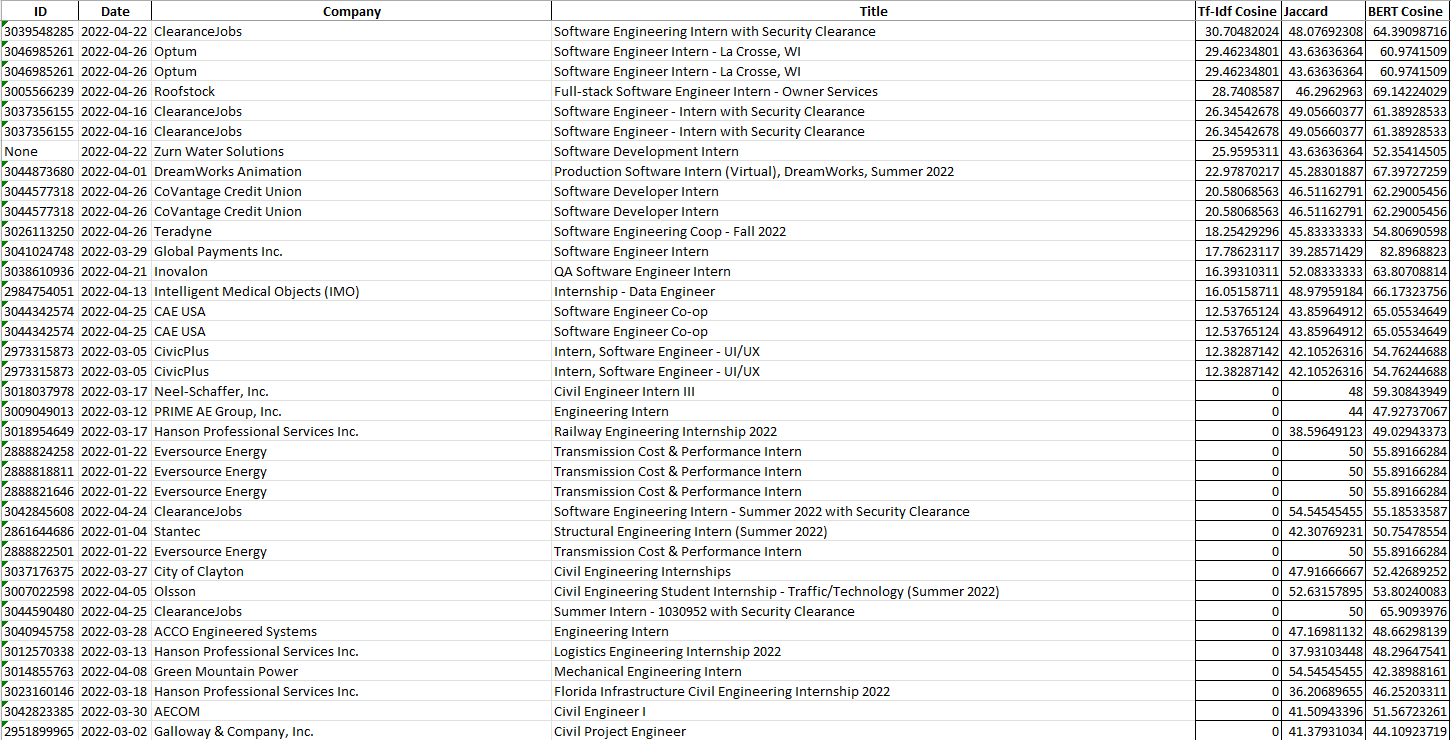

Since we dont have any test data, we dont have any strong evaluation metric, but this picture clearly explains why Td-idf with cosine similarity is the best algorithm for our project.
- Since the resume belongs to computer science student, the skillset for Job title related to Computer Science (like Software Engineer) matches and gives score.
- All non-computer science related work(like Civil Engineer, Mechanical Engineer, other internships) returns score of 0.

Becuase of these facts we can strongly suggest that Tf- idf with cosine similarity works better in our case.

Interesting inference:
- The highest score in all the algorithms is for the same job, job ID "3044390427"

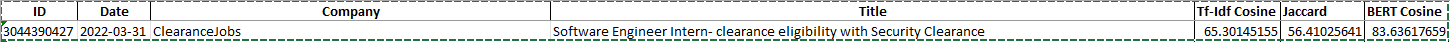

About algorithm running Time

Tf-idf with Cosine Similarity - 3.07 s

BERT with Cosine Similarity - 25.6 s

Jaccard Similarity - 2.82 s

- Tf-idf with cosine similarity is considerably faster
- The fastest is the Jaccard because the algorithm doesnt need vectorization, another reason it gives poor similarity score
- Slowest among them is BERT, because it is Transformer